In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DIR = '/content/drive/MyDrive/train'
classes = [i for i in os.listdir(DIR)]
len(classes)

31

In [5]:
data = []

for class_name in classes:
    class_dir = os.path.join(DIR, class_name)
    image_files = [os.path.join(class_dir, file) for file in os.listdir(class_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    class_data = [(image_file, class_name) for image_file in image_files]
    data.extend(class_data)

fData = pd.DataFrame(data, columns=['Path', 'Label'])
fData.head()

,Path,Label
0,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp
1,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp
2,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp
3,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp
4,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp


In [6]:
print(fData.shape)
fData.Path[0]

(8810, 2)


'/content/drive/MyDrive/train/Silver Carp/Silver-Body (12).JPG'

In [7]:
fData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810 entries, 0 to 8809
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    8810 non-null   object
 1   Label   8810 non-null   object
dtypes: object(2)
memory usage: 137.8+ KB


In [8]:
fData['Label'].value_counts()

Grass Carp               1212
Goby                      607
Glass Perchlet            407
Silver Barb               329
Knifefish                 319
Catfish                   314
Gourami                   311
Tilapia                   294
Perch                     293
Janitor Fish              286
Silver Perch              283
Tenpounder                277
Freshwater Eel            271
Indian Carp               262
Long-Snouted Pipefish     256
Mosquito Fish             254
Silver Carp               238
Snakehead                 232
Jaguar Gapote             229
Gold Fish                 206
Big Head Carp             201
Black Spotted Barb        200
Pangasius                 199
Fourfinger Threadfin      191
Mudfish                   189
Indo-Pacific Tarpon       186
Mullet                    177
Bangus                    171
Scat Fish                 154
Climbing Perch            152
Green Spotted Puffer      110
Name: Label, dtype: int64

In [9]:
idx=0
plt.figure(figsize=(23,28))
for i in fData['Label'].unique():
  plt.subplot(8,4, idx+1)
  plt.imshow(plt.imread(fData[fData['Label']==i].iloc[0,0]))
  plt.title(i)
  plt.axis('off')
  idx+=1

Output hidden; open in https://colab.research.google.com to view.

In [10]:
train_fData, test_fData = train_test_split(fData, train_size=0.80, shuffle=True, random_state=42)

In [11]:
print(train_fData.shape, test_fData.shape)

(7048, 2) (1762, 2)


In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input)

In [13]:
train_image = train_generator.flow_from_dataframe(dataframe=train_fData, x_col='Path', y_col='Label', target_size=(224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_image = train_generator.flow_from_dataframe(dataframe=train_fData, x_col='Path', y_col='Label', target_size=(224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation')
test_image = train_generator.flow_from_dataframe(dataframe=test_fData, x_col='Path', y_col='Label', target_size=(224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True)

Found 5639 validated image filenames belonging to 31 classes.
Found 1409 validated image filenames belonging to 31 classes.
Found 1762 validated image filenames belonging to 31 classes.


In [14]:
display(train_image.class_indices)
display(val_image.class_indices)
display(test_image.class_indices)

{'Bangus': 0,
 'Big Head Carp': 1,
 'Black Spotted Barb': 2,
 'Catfish': 3,
 'Climbing Perch': 4,
 'Fourfinger Threadfin': 5,
 'Freshwater Eel': 6,
 'Glass Perchlet': 7,
 'Goby': 8,
 'Gold Fish': 9,
 'Gourami': 10,
 'Grass Carp': 11,
 'Green Spotted Puffer': 12,
 'Indian Carp': 13,
 'Indo-Pacific Tarpon': 14,
 'Jaguar Gapote': 15,
 'Janitor Fish': 16,
 'Knifefish': 17,
 'Long-Snouted Pipefish': 18,
 'Mosquito Fish': 19,
 'Mudfish': 20,
 'Mullet': 21,
 'Pangasius': 22,
 'Perch': 23,
 'Scat Fish': 24,
 'Silver Barb': 25,
 'Silver Carp': 26,
 'Silver Perch': 27,
 'Snakehead': 28,
 'Tenpounder': 29,
 'Tilapia': 30}

{'Bangus': 0,
 'Big Head Carp': 1,
 'Black Spotted Barb': 2,
 'Catfish': 3,
 'Climbing Perch': 4,
 'Fourfinger Threadfin': 5,
 'Freshwater Eel': 6,
 'Glass Perchlet': 7,
 'Goby': 8,
 'Gold Fish': 9,
 'Gourami': 10,
 'Grass Carp': 11,
 'Green Spotted Puffer': 12,
 'Indian Carp': 13,
 'Indo-Pacific Tarpon': 14,
 'Jaguar Gapote': 15,
 'Janitor Fish': 16,
 'Knifefish': 17,
 'Long-Snouted Pipefish': 18,
 'Mosquito Fish': 19,
 'Mudfish': 20,
 'Mullet': 21,
 'Pangasius': 22,
 'Perch': 23,
 'Scat Fish': 24,
 'Silver Barb': 25,
 'Silver Carp': 26,
 'Silver Perch': 27,
 'Snakehead': 28,
 'Tenpounder': 29,
 'Tilapia': 30}

{'Bangus': 0,
 'Big Head Carp': 1,
 'Black Spotted Barb': 2,
 'Catfish': 3,
 'Climbing Perch': 4,
 'Fourfinger Threadfin': 5,
 'Freshwater Eel': 6,
 'Glass Perchlet': 7,
 'Goby': 8,
 'Gold Fish': 9,
 'Gourami': 10,
 'Grass Carp': 11,
 'Green Spotted Puffer': 12,
 'Indian Carp': 13,
 'Indo-Pacific Tarpon': 14,
 'Jaguar Gapote': 15,
 'Janitor Fish': 16,
 'Knifefish': 17,
 'Long-Snouted Pipefish': 18,
 'Mosquito Fish': 19,
 'Mudfish': 20,
 'Mullet': 21,
 'Pangasius': 22,
 'Perch': 23,
 'Scat Fish': 24,
 'Silver Barb': 25,
 'Silver Carp': 26,
 'Silver Perch': 27,
 'Snakehead': 28,
 'Tenpounder': 29,
 'Tilapia': 30}

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

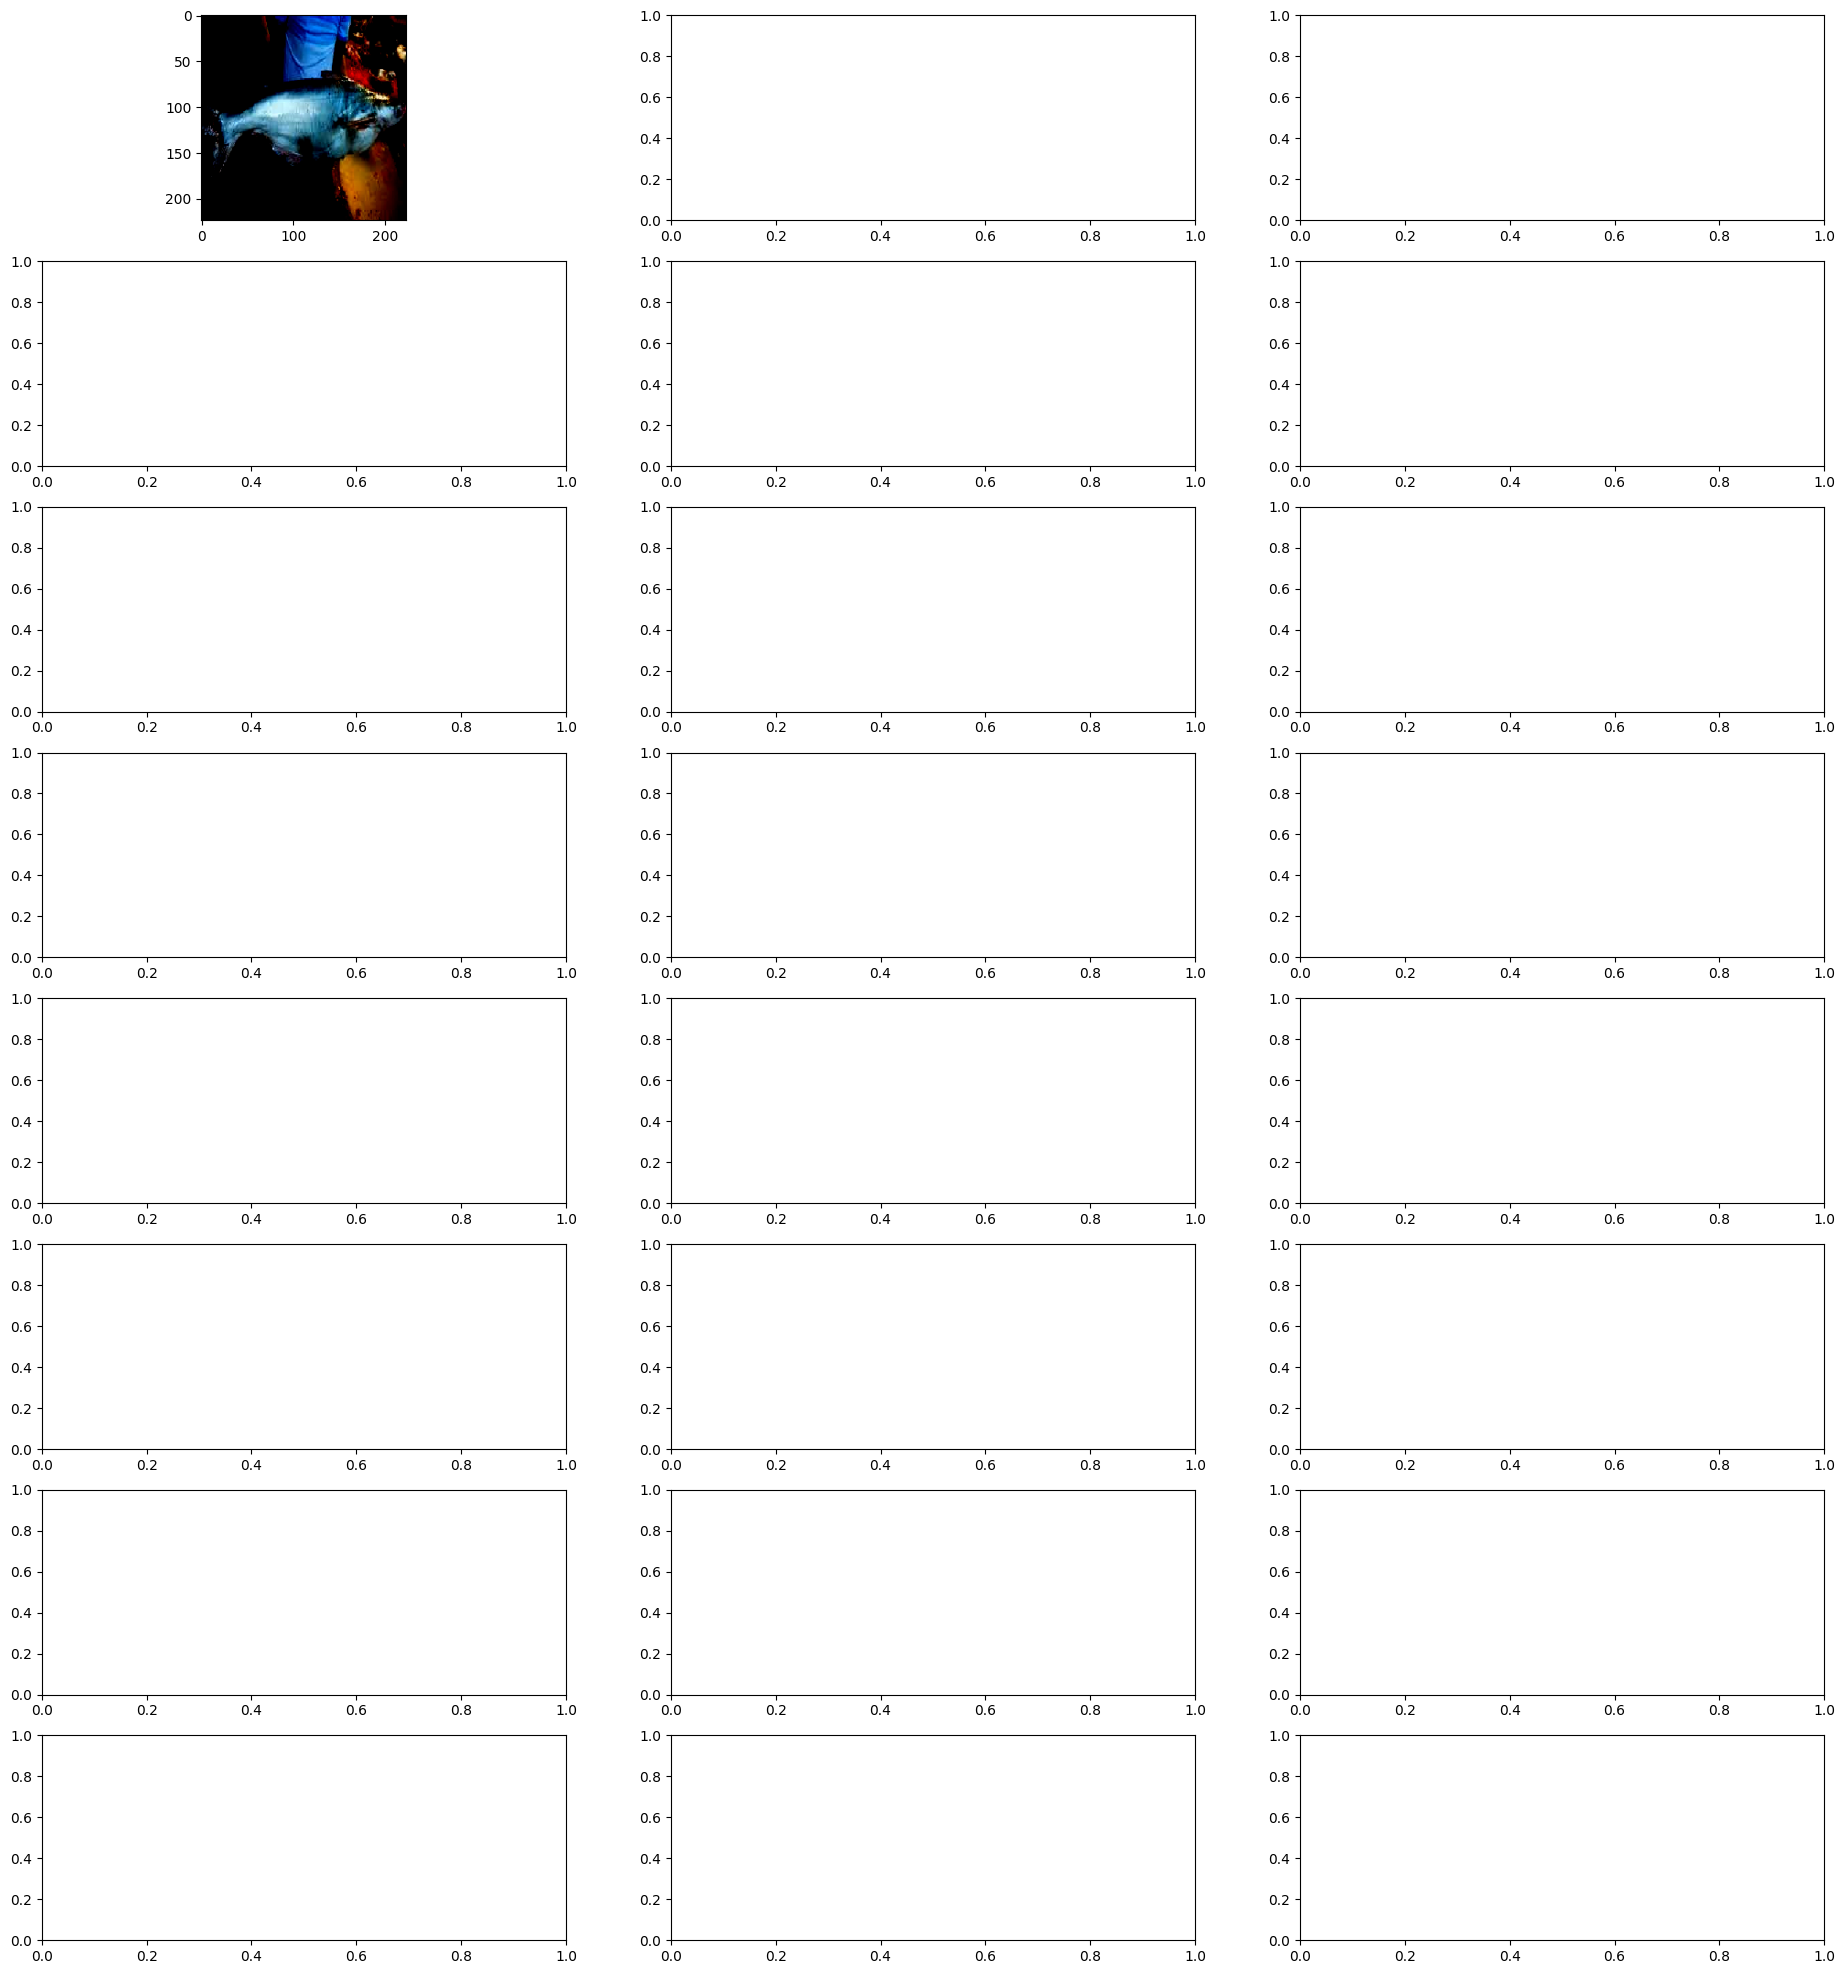

In [16]:
fit, ax = plt.subplots(nrows=8, ncols=3, figsize=(23,25))
ax=ax.flatten()
j=0
for _ in range(6):
  img, label = test_image.next()
  ax[j].imshow(img[0],)
  ax[j].set_title(label[0])
  j+=1

In [17]:
pretrained_model = tf.keras.applications.MobileNetV2 (
    input_shape=(224,224,3),
    include_top = False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [18]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(31, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_image,
                    validation_data = val_image,
                    epochs=5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [22]:
results = model.evaluate(test_image, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}".format(results[1]*100))

Test Loss: 0.67181
Test Accuracy: 80.99


In [21]:
pred = model.predict(test_image)
pred = np.argmax(pred, axis=1)

56/56 [==============================] - 133s 2s/step


In [23]:
pred_df = test_fData.copy()
labels={}
for l,v in test_image.class_indices.items():
  labels.update({v:1})
pred_df['pred'] = pred
pred_df['pred'] = pred_df['pred'].apply(lambda x: labels[x])

In [24]:
pred_df = pred_df.reset_index(drop=True)
pred_df.head()

,Path,Label,pred
0,/content/drive/MyDrive/train/Grass Carp/d0dfcc...,Grass Carp,1
1,/content/drive/MyDrive/train/Bangus/Bangus 46.jpg,Bangus,1
2,/content/drive/MyDrive/train/Mosquito Fish/Mos...,Mosquito Fish,1
3,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp,1
4,/content/drive/MyDrive/train/Goby/ornate sleep...,Goby,1


In [26]:
pred_df[pred_df['Label']!=pred_df['pred']]

,Path,Label,pred
0,/content/drive/MyDrive/train/Grass Carp/d0dfcc...,Grass Carp,1
1,/content/drive/MyDrive/train/Bangus/Bangus 46.jpg,Bangus,1
2,/content/drive/MyDrive/train/Mosquito Fish/Mos...,Mosquito Fish,1
3,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp,1
4,/content/drive/MyDrive/train/Goby/ornate sleep...,Goby,1
...,...,...,...
1757,/content/drive/MyDrive/train/Scat Fish/Picture...,Scat Fish,1
1758,/content/drive/MyDrive/train/Silver Carp/Silve...,Silver Carp,1
1759,/content/drive/MyDrive/train/Fourfinger Thread...,Fourfinger Threadfin,1
1760,/content/drive/MyDrive/train/Mosquito Fish/Mos...,Mosquito Fish,1


In [34]:
model.save("marine_model.h5")